# Ejercicio 1. Análisis Exploratorio de Datos

# **1. Análisis Exploratorio de Datos**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install statsmodels scipy scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.0 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from itertools import combinations
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import OneHotEncoder
import gc  # Garbage Collector

## **1.1. Dataset Velocidad del Viento**

In [5]:
df_viento = pd.read_csv("https://raw.githubusercontent.com/lihkir/Data/refs/heads/main/wind_speed/data_treino_dv_df_2000_2010.csv")

df_viento

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87688,19:00,-0.615661,5.6,83.0,78.0,21.8,21.1,80.0,879.1,0.0,12.3,879.8,879.1
87689,20:00,-0.469472,4.9,84.0,79.0,21.7,21.0,84.0,879.2,0.0,9.9,879.2,878.9
87690,21:00,-0.484810,4.5,86.0,82.0,21.2,20.6,86.0,879.7,0.0,8.9,879.8,879.2
87691,22:00,-0.484810,3.2,88.0,85.0,20.6,20.2,88.0,880.5,0.0,8.0,880.5,879.6


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> El conjunto de datos presentado contiene <strong>87.693 registros</strong> y <strong>13 columnas</strong>. Se observa que los nombres de las columnas presentan problemas de codificación de caracteres, probablemente por no haberse especificado correctamente el <em>encoding</em> al momento de la carga, se procede a realizar las correcciones para evitar causar errores en los análisis posteriores.<br><br> Igualemnte se realizará <strong>corrección de nombres de columnas</strong>, con nombres más claros, en minúscula y sin espacios, como los siguientes: <ul> <li><code>hora_utc</code></li> <li><code>viento_direccion_horaria</code></li> <li><code>viento_velocidad_horaria</code></li> <li><code>humedad_relativa_max_ant</code></li> <li><code>humedad_relativa_min_ant</code></li> <li><code>temperatura_max_ant</code></li> <li><code>temperatura_min_ant</code></li> <li><code>humedad_relativa_hora</code></li> <li><code>presion_nivel_estacion</code></li> <li><code>precipitacion_total_hora</code></li> <li><code>viento_rajada_max</code></li> <li><code>presion_max_hora_ant</code></li> <li><code>presion_min_hora_ant</code></li> </ul> Esta limpieza facilitará la manipulación de datos y mejorará la calidad de los análisis exploratorios posteriores. </div> </div>

In [6]:
df_viento.columns

Index(['HORA (UTC)', 'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))',
       'VENTO, VELOCIDADE HORARIA (m/s)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)',
       'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)', 'VENTO, RAJADA MAXIMA (m/s)',
       'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'],
      dtype='object')

### **1.1.1 Reducción de nombres extensos en columnas**

In [ ]:
df_viento.columns = [
    "hora", "viento_direccion_horaria", "viento_velocidad_horaria",
    "humedad_max_hora", "humedad_min_hora", "temp_min_hora", "temp_max_hora",
    "humedad_relativa", "presion_armosferica", "precip_atmos_total", "viento_bajada_max",
    "precip_atmos_max", "precip_atmos_min"
]

df_viento

,hora,viento_direccion_horaria,viento_velocidad_horaria,humedad_max_hora,humedad_min_hora,temp_min_hora,temp_max_hora,humedad_relativa,presion_armosferica,precip_atmos_total,viento_bajada_max,precip_atmos_max,precip_atmos_min
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87688,19:00,-0.615661,5.6,83.0,78.0,21.8,21.1,80.0,879.1,0.0,12.3,879.8,879.1
87689,20:00,-0.469472,4.9,84.0,79.0,21.7,21.0,84.0,879.2,0.0,9.9,879.2,878.9
87690,21:00,-0.484810,4.5,86.0,82.0,21.2,20.6,86.0,879.7,0.0,8.9,879.8,879.2
87691,22:00,-0.484810,3.2,88.0,85.0,20.6,20.2,88.0,880.5,0.0,8.0,880.5,879.6


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> Se realizó la <strong>reducción y corrección de nombres de columnas</strong> para el conjunto de datos de velocidad del viento. Los nombres fueron estandarizados a minúsculas, sin caracteres especiales ni espacios, facilitando así su manipulación futura en análisis y modelado.<br><br> Las nuevas columnas son: <code>hora</code>, <code>viento_direccion_horaria</code>, <code>viento_velocidad_horaria</code>, <code>humedad_max_hora</code>, <code>humedad_min_hora</code>, <code>temp_min_hora</code>, <code>temp_max_hora</code>, <code>humedad_relativa</code>, <code>presion_armosferica</code>, <code>precip_atmos_total</code>, <code>viento_bajada_max</code>, <code>precip_atmos_max</code> y <code>precip_atmos_min</code>.<br><br> Esta limpieza asegura mayor compatibilidad al usar librerías como <code>scikit-learn</code>, <code>statsmodels</code> y <code>seaborn</code>, además de evitar errores comunes en tareas como selección de variables, imputación de datos o creación de pipelines. </div> </div>

In [8]:
df_viento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hora                      87693 non-null  object 
 1   viento_direccion_horaria  87693 non-null  float64
 2   viento_velocidad_horaria  87693 non-null  float64
 3   humedad_max_hora          87693 non-null  float64
 4   humedad_min_hora          87693 non-null  float64
 5   temp_min_hora             87693 non-null  float64
 6   temp_max_hora             87693 non-null  float64
 7   humedad_relativa          87693 non-null  float64
 8   presion_armosferica       87693 non-null  float64
 9   precip_atmos_total        87693 non-null  float64
 10  viento_bajada_max         87693 non-null  float64
 11  precip_atmos_max          87693 non-null  float64
 12  precip_atmos_min          87693 non-null  float64
dtypes: float64(12), object(1)
memory usage: 8.7+ MB


El conjunto de datos tiene 87693 registros y 13 columnas.

Sólo una columna es de tipo texto (hora), todas las demás son numéricas.

No hay valores nulos en ninguna de las columnas, lo cual es excelente para el análisis predictivo.

### **1.1.2 Descripcion de media, desv, min, max, cuartiles**

In [ ]:
df_viento.describe()

,viento_direccion_horaria,viento_velocidad_horaria,humedad_max_hora,humedad_min_hora,temp_min_hora,temp_max_hora,humedad_relativa,presion_armosferica,precip_atmos_total,viento_bajada_max,precip_atmos_max,precip_atmos_min
count,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000
mean,0.405810,2.466192,69.058465,63.176194,21.921264,20.684570,66.146682,887.251925,0.160907,5.161076,887.580724,886.891093
std,0.686247,1.313968,19.640222,20.166336,3.721386,3.513744,19.992327,4.012404,1.307515,2.311157,3.646750,3.564539
min,-1.000000,0.000000,12.000000,10.000000,9.200000,8.400000,10.000000,863.400000,0.000000,0.000000,865.300000,862.800000
25%,-0.156434,1.500000,54.000000,48.000000,19.200000,18.400000,51.000000,885.300000,0.000000,3.400000,885.600000,885.000000
50%,0.788011,2.400000,72.000000,64.000000,21.400000,20.200000,68.000000,887.200000,0.000000,5.000000,887.500000,886.900000
75%,0.970296,3.400000,87.000000,80.000000,24.700000,23.100000,84.000000,889.100000,0.000000,6.800000,889.300000,888.800000
max,1.000000,10.000000,100.000000,98.000000,35.300000,34.400000,99.000000,1023.500000,70.800000,24.300000,913.100000,910.900000


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> A partir del resumen estadístico general de las variables numéricas del dataset <code>df_viento</code>, se pueden destacar los siguientes puntos clave: <ul> <li><strong>Viento dirección horaria:</strong> Sus valores oscilan entre -1 y 1, confirmando que se trata probablemente de una transformación trigonométrica (como coseno o seno de la dirección del viento).</li> <li><strong>Viento velocidad horaria:</strong> La media es 2.46 m/s, con un máximo de 10 m/s. Predominan velocidades bajas, como se anticipaba en los histogramas anteriores.</li> <li><strong>Humedad relativa:</strong> La humedad promedio es alta (66.1%), con valores mínimos desde 10% y máximos hasta 99%, lo cual refleja una amplia variabilidad atmosférica.</li> <li><strong>Temperatura mínima y máxima por hora:</strong> Las temperaturas mínimas varían de 9.2°C a 35.3°C y las máximas de 8.4°C a 34.4°C, mostrando rangos compatibles con climas variados.</li> <li><strong>Presión atmosférica:</strong> Valores normales para estaciones meteorológicas de baja altitud (media de 887.25 mB), pero con algunos extremos que podrían ser revisados en limpieza.</li> <li><strong>Precipitación total horaria:</strong> Presenta una media muy baja (0.16 mm), lo que indica que en la mayoría de las horas no llueve, aunque existen máximos puntuales de hasta 70.8 mm.</li> <li><strong>Viento bajada máxima:</strong> Alcanzó valores extremos hasta 24.3 m/s en algunas mediciones, sugiriendo posibles eventos de ráfagas de viento importantes.</li> </ul> El análisis confirma patrones de asimetría, posibles outliers y heterogeneidad en algunas variables que deberán ser considerados en futuras etapas de modelado. </div> </div>

### **1.1.3. Datos faltantes**

In [ ]:
print("Cantidad de nulos:\n")
print(df_viento.isna().sum())

print("No hay valores nulos en ninguna columna.")

Cantidad de nulos:

hora                        0
viento_direccion_horaria    0
viento_velocidad_horaria    0
humedad_max_hora            0
humedad_min_hora            0
temp_min_hora               0
temp_max_hora               0
humedad_relativa            0
presion_armosferica         0
precip_atmos_total          0
viento_bajada_max           0
precip_atmos_max            0
precip_atmos_min            0
dtype: int64
No hay valores nulos en ninguna columna.


### **1.1.4. Seleccion de variables independientes**

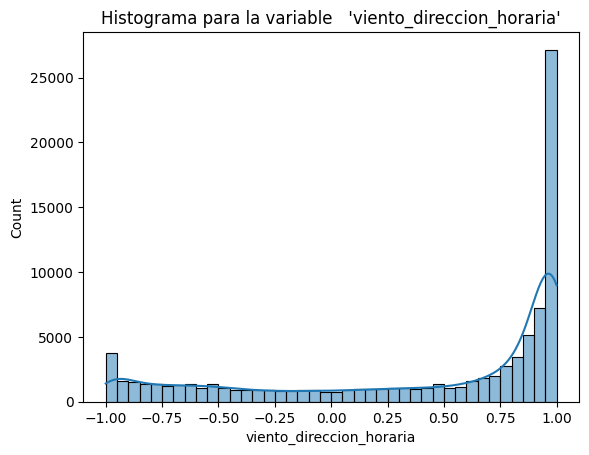

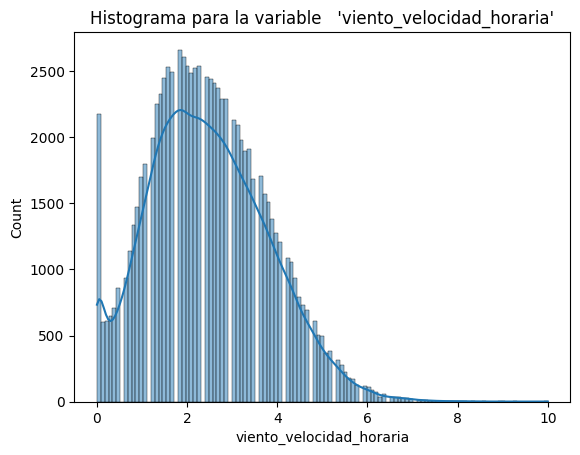

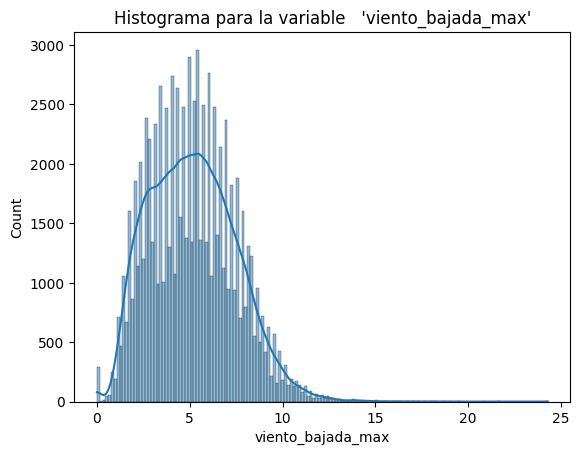

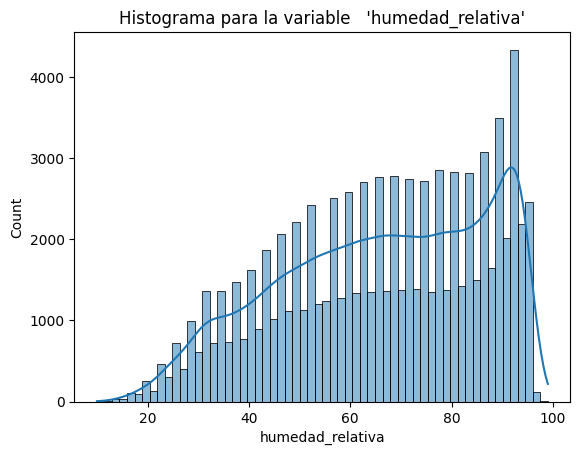

In [ ]:
viento_variables_independientes = [
    "viento_direccion_horaria",
    "viento_velocidad_horaria",
    "viento_bajada_max",
    "humedad_relativa"
]

for variable in viento_variables_independientes:
    sns.histplot(
        data=df_viento,
        x=variable,
        kde=True
    )
    plt.title(f"Histograma para la variable   '{variable}'")
    plt.show()

<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 humedad_relativa</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> Esta variable muestra una distribución sesgada a la izquierda, con una alta concentración de observaciones por encima del 60%, alcanzando su punto máximo cerca del 100%. Esto sugiere que la mayoría de los registros presentan niveles elevados de humedad relativa. La densidad suavizada muestra una tendencia creciente sostenida hacia valores altos, lo cual podría tener implicaciones en modelos relacionados con climatología o confort ambiental. </div> </div> <br> <div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 viento_direccion_horaria</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> La distribución de esta variable es bimodal, con valores extremos centrados en -1 y 1, lo cual sugiere que se trata de una codificación angular (por ejemplo, seno o coseno de la dirección del viento). Esta forma de representación permite tratar direcciones circulares en modelos de aprendizaje automático. Es importante tratar esta variable cuidadosamente en análisis multivariado debido a su naturaleza circular. </div> </div> <br> <div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 viento_velocidad_horaria</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> La variable presenta una distribución sesgada a la derecha, con un alto número de observaciones entre 0 y 3 m/s. Esto indica que la velocidad del viento por hora generalmente es baja, con pocos registros de velocidades superiores a 6 m/s. Este comportamiento es típico en zonas donde predominan condiciones atmosféricas estables o poco ventosas. </div> </div> <br> <div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 viento_bajada_max</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> Al igual que la velocidad horaria del viento, esta variable muestra una distribución claramente asimétrica hacia la derecha. La mayoría de los valores se concentran entre 0 y 6, con un número decreciente de registros a medida que se incrementa la intensidad. Este patrón podría representar ráfagas ocasionales o descensos breves de viento que rara vez superan los 10 m/s. </div> </div>

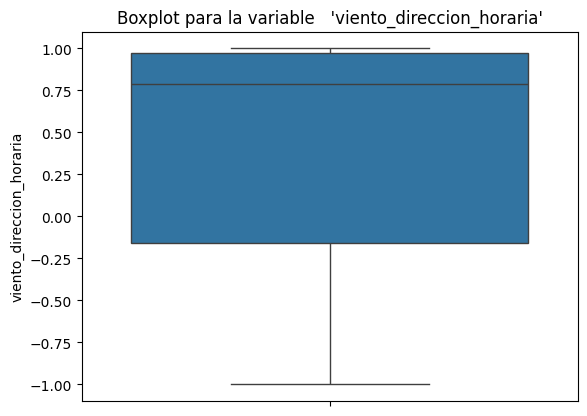

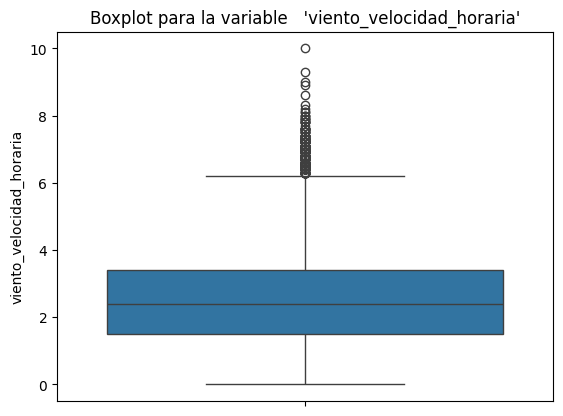

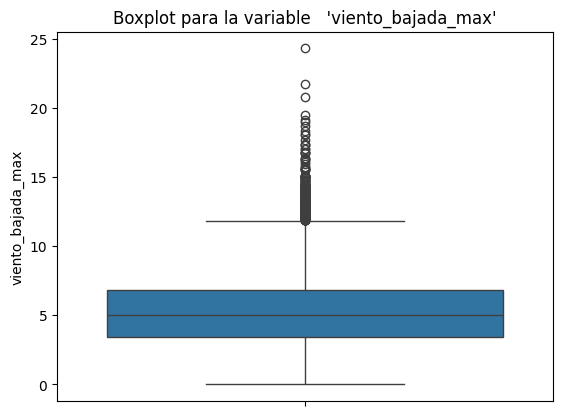

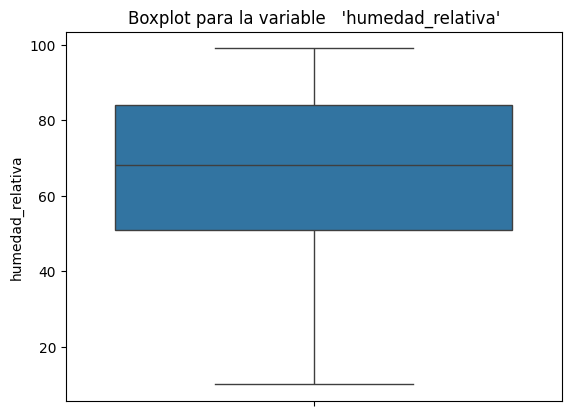

In [12]:
for variable in viento_variables_independientes:
    sns.boxplot(
        data=df_viento,
        y=variable
    )
    plt.title(f"Boxplot para la variable   '{variable}'")
    plt.show()

<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 viento_direccion_horaria</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> El boxplot muestra que la mayoría de los valores se concentran en el rango superior, entre 0.0 y 1.0. La mediana está cerca del límite superior, lo cual refuerza lo observado en el histograma: los datos están fuertemente sesgados hacia valores positivos. No se observan outliers extremos, pero el rango de los datos cubre casi todo el espectro entre -1 y 1, característico de transformaciones trigonométricas. </div> </div> <br> <div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 viento_velocidad_horaria:</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> Se observa una notable cantidad de valores atípicos por encima del valor 6, lo cual sugiere la presencia de registros con velocidades de viento superiores al promedio típico del conjunto. La mediana está cercana a 2 m/s, con una asimetría a la derecha. Este patrón es consistente con fenómenos meteorológicos puntuales donde se presentan ráfagas aisladas. </div> </div> <br> <div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 viento_bajada_max</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> Este boxplot revela una cantidad importante de outliers por encima de los 12 m/s, llegando incluso a valores cercanos a 25. Esto indica que, si bien la mayoría de los datos se concentran en el rango entre 3 y 7 m/s, existen casos extremos que podrían corresponder a eventos meteorológicos intensos. La mediana está bien centrada en el cuerpo principal de los datos. </div> </div> <br> <div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 humedad_relativa</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> La distribución de la humedad relativa presenta una amplia dispersión con algunos valores mínimos por debajo de 20% que podrían considerarse outliers. Sin embargo, no se observa una gran cantidad de valores atípicos extremos. La mediana está alrededor del 70%, lo que refuerza la observación previa sobre la tendencia a altos niveles de humedad. </div> </div>

1. Simetría

    - `viento_direccion_horaria`: Presenta asimetría leve, con mayor densidad hacia valores positivos. Esto puede estar relacionado con una codificación trigonométrica (ej. valores tipo cos(θ)), por lo que es normal no ver una forma de campana simétrica.

    - `viento_velocidad_horaria` y `viento_bajada_max`: Ambas tienen una distribución asimétrica positiva o sesgada a la derecha, es decir, hay una mayor concentración de datos en valores bajos, pero con una "cola" que se extiende hacia valores más altos.

    - `humedad_relativa`: Es la más simétrica del grupo, con una forma parecida a una distribución normal, centrada cerca del 65%.

2. Datos Atípicos (Outliers)


    - `viento_velocidad_horaria`: Tiene varios outliers por encima de 6 m/s, indicando eventos esporádicos de viento fuerte. Estos datos son importantes en contextos de energía eólica porque pueden representar picos de generación.

    - `viento_bajada_max`: Tiene la mayor cantidad de outliers. Algunos registros alcanzan más de 20 m/s, lo que podría ser relevante para estudios de condiciones extremas o alertas meteorológicas.

    - `viento_direccion_horaria`: Tiene unos cuantos valores fuera del rango principal, aunque no son extremos en cantidad.

    - `humedad_relativa`: Tiene pocos outliers. Esto refuerza que es una variable estable a lo largo del tiempo.

3. Dispersión

    - Alta dispersión:

        - `viento_bajada_max`: Gran variabilidad, desde valores bajos (cercanos a 0) hasta más de 24 m/s.

        - `viento_velocidad_horaria`: Aunque en menor medida, también muestra amplitud de valores.

    - Dispersión moderada:

        - `viento_direccion_horaria`: Tiene un rango amplio entre -1 y 1, pero la mayoría de los valores están concentrados en zonas específicas.

    - Baja dispersión:

        - `humedad_relativa`: Tiene valores bastante agrupados entre 50% y 85%, lo cual indica estabilidad.



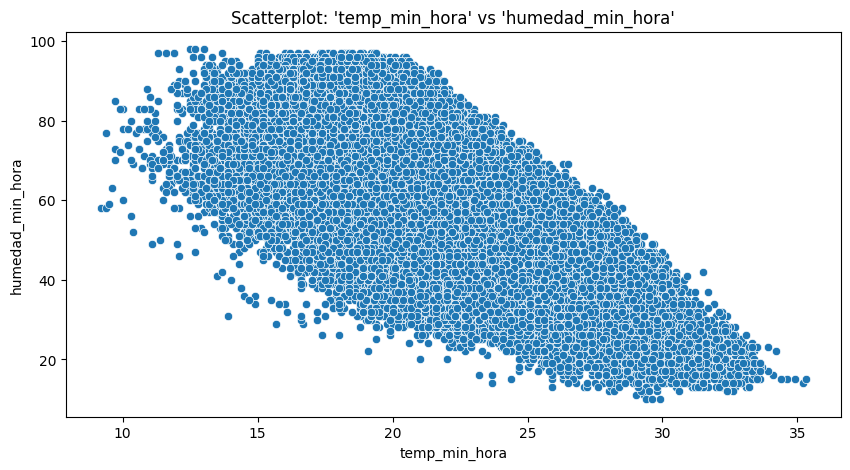

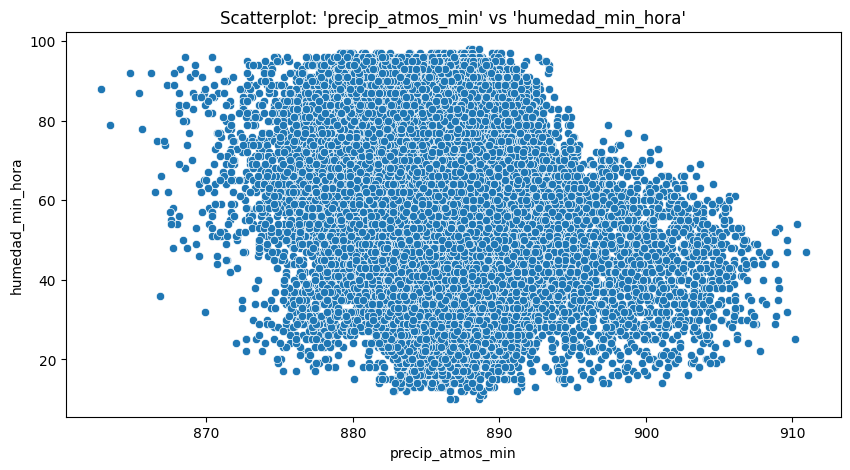

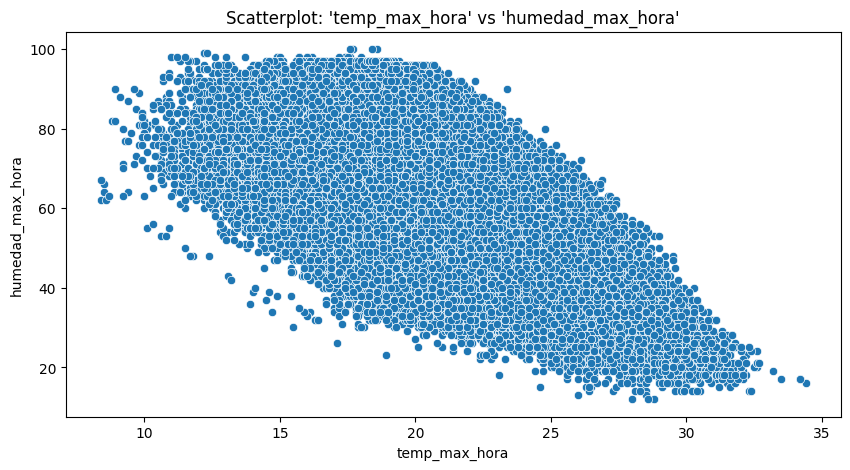

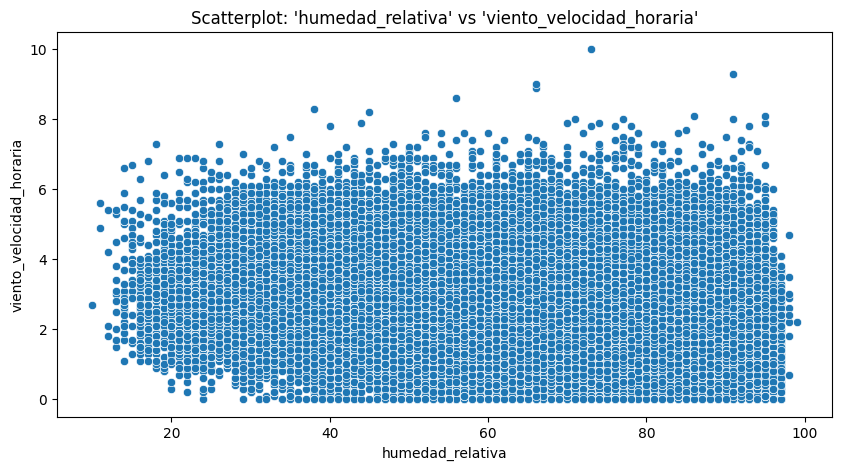

In [13]:

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_viento, x="temp_min_hora", y='humedad_min_hora')
plt.title("Scatterplot: 'temp_min_hora' vs 'humedad_min_hora'")
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_viento, x="precip_atmos_min", y='humedad_min_hora')
plt.title("Scatterplot: 'precip_atmos_min' vs 'humedad_min_hora'")
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_viento, x="temp_max_hora", y='humedad_max_hora')
plt.title("Scatterplot: 'temp_max_hora' vs 'humedad_max_hora'")
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_viento, x="humedad_relativa", y='viento_velocidad_horaria')
plt.title("Scatterplot: 'humedad_relativa' vs 'viento_velocidad_horaria'")
plt.show()

<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong> 💡Pareja de variables:</strong> <code>temp_min_hora</code> vs <code>humedad_min_hora</code><br>  </div> <div style="background-color: #f5fdf9; padding: 12px;"> Se observa una fuerte relación negativa entre ambas variables: a medida que aumenta la temperatura mínima, la humedad mínima tiende a disminuir. La forma compacta del gráfico sugiere una correlación lineal inversa, lo que es esperable en climas donde la temperatura impacta directamente la capacidad del aire de retener humedad. </div> </div> <br> <div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡Pareja de variables:</strong> <code>precip_atmos_min</code> vs <code>humedad_min_hora</code><br> </div> <div style="background-color: #f5fdf9; padding: 12px;"> No se evidencia una relación clara entre la presión atmosférica mínima y la humedad mínima. El patrón disperso sugiere que estas variables no están directamente correlacionadas, o que su relación podría depender de factores externos no incluidos en este análisis, como la altitud o condiciones meteorológicas particulares. </div> </div> <br> <div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Pareja de variables:</strong> <code>temp_max_hora</code> vs <code>humedad_max_hora</code><br> </div> <div style="background-color: #f5fdf9; padding: 12px;">  Al igual que con la temperatura mínima, se observa una fuerte relación inversa entre la temperatura máxima y la humedad máxima. A mayor temperatura, la humedad disminuye, lo cual es consistente con el comportamiento físico del aire que incrementa su capacidad de retener agua cuando se calienta. </div> </div> <br> <div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡Pareja de variables:</strong> <code>humedad_relativa</code> vs <code>viento_velocidad_horaria</code><br> </strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> En este caso no se identifica una relación clara. La velocidad del viento se mantiene dispersa a lo largo de todo el rango de humedad relativa, lo que sugiere independencia entre ambas variables. Esto puede implicar que la velocidad del viento no está directamente asociada a los niveles de humedad ambiental. </div> </div>

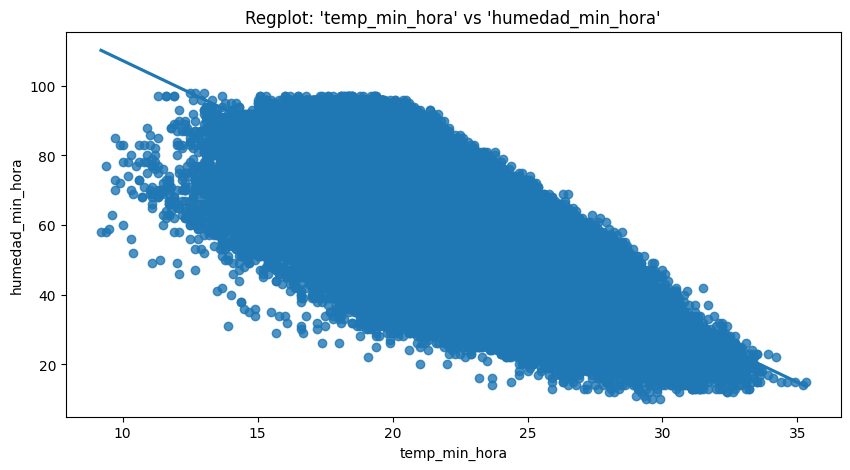

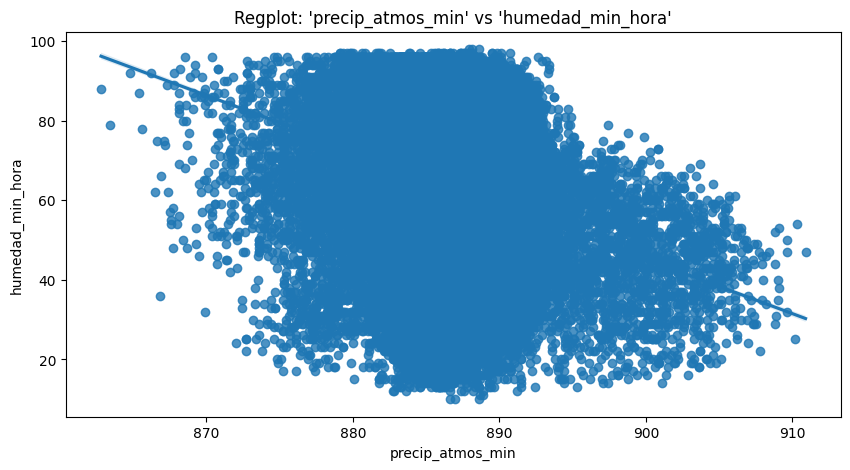

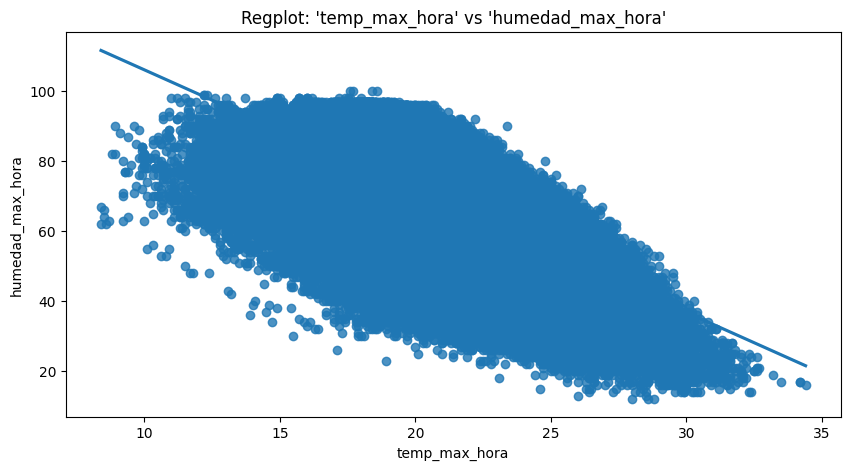

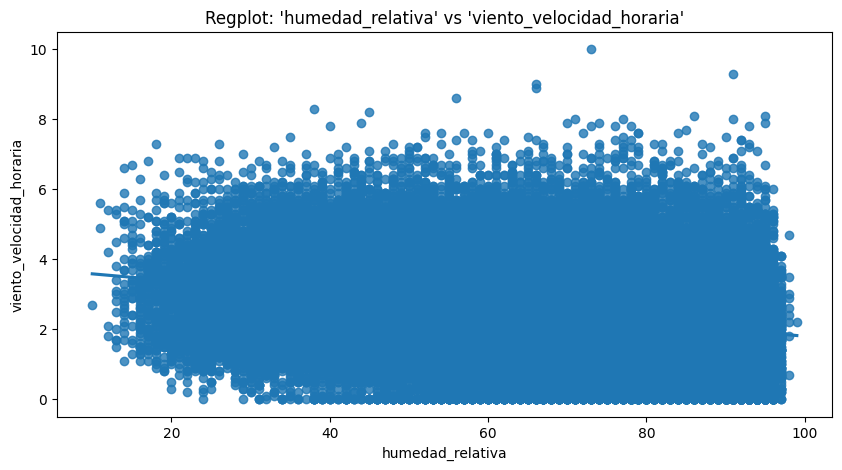

In [14]:
plt.figure(figsize=(10, 5))
sns.regplot(data=df_viento, x="temp_min_hora", y='humedad_min_hora')
plt.title("Regplot: 'temp_min_hora' vs 'humedad_min_hora'")
plt.show()

plt.figure(figsize=(10, 5))
sns.regplot(data=df_viento, x="precip_atmos_min", y='humedad_min_hora')
plt.title("Regplot: 'precip_atmos_min' vs 'humedad_min_hora'")
plt.show()

plt.figure(figsize=(10, 5))
sns.regplot(data=df_viento, x="temp_max_hora", y='humedad_max_hora')
plt.title("Regplot: 'temp_max_hora' vs 'humedad_max_hora'")
plt.show()

plt.figure(figsize=(10, 5))
sns.regplot(data=df_viento, x="humedad_relativa", y='viento_velocidad_horaria')
plt.title("Regplot: 'humedad_relativa' vs 'viento_velocidad_horaria'")
plt.show()

ChatGPT dijo:
Excelente, ahora incluyo el análisis de los gráficos de regresión lineal (regplot) en el mismo formato estructurado:

<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡Pareja de variables:</strong> <code>temp_min_hora</code> vs <code>humedad_min_hora</code><br>  </div> <div style="background-color: #f5fdf9; padding: 12px;"> El gráfico de regresión confirma la fuerte relación negativa observada en el scatterplot. La pendiente descendente indica que a menor temperatura mínima corresponde una mayor humedad mínima. Este patrón podría deberse al efecto de la condensación del agua en temperaturas bajas, común en ambientes húmedos durante la noche o madrugada. </div> </div> <br> <div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡Pareja de variables:</strong> <code>precip_atmos_min</code> vs <code>humedad_min_hora</code><br>  </div> <div style="background-color: #f5fdf9; padding: 12px;"> A pesar de la dispersión de los datos, la línea de regresión presenta una pendiente levemente negativa, lo que sugiere una posible y muy débil relación inversa. Sin embargo, la baja pendiente y la gran variabilidad de los datos indican que la presión atmosférica mínima no es un buen predictor de la humedad mínima en este conjunto. </div> </div> <br> <div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Pareja de variables:</strong> <code>temp_max_hora</code> vs <code>humedad_max_hora</code><br>  </div> <div style="background-color: #f5fdf9; padding: 12px;"> La regresión lineal refuerza la observación de una correlación negativa. La línea descendente es bastante pronunciada, lo que indica que a mayores temperaturas máximas, se asocian niveles más bajos de humedad máxima. Esto puede ser explicado por la mayor capacidad del aire caliente de retener vapor de agua sin condensarse. </div> </div> <br> <div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Pareja de variables:</strong> <code>humedad_relativa</code> vs <code>viento_velocidad_horaria</code><br>  </div> <div style="background-color: #f5fdf9; padding: 12px;"> La línea de regresión es prácticamente plana, lo que confirma la falta de correlación entre estas dos variables. En este caso, la velocidad del viento no parece verse afectada por los niveles de humedad relativa, lo cual puede indicar que están reguladas por diferentes mecanismos atmosféricos o geográficos. </div> </div>

## **1.2. Dataset Deteccion de Fraude**

In [ ]:
df_test_identity = pd.read_csv("/content/drive/MyDrive/Trabajo Online/Andres Pedraza/Trabajo 3/fraude/test_identity.csv")
df_test_transaction = pd.read_csv("/content/drive/MyDrive/Trabajo Online/Andres Pedraza/Trabajo 3/fraude/test_transaction.csv")

df_train_identity = pd.read_csv("/content/drive/MyDrive/Trabajo Online/Andres Pedraza/Trabajo 3/fraude/train_identity.csv")
df_train_transaction = pd.read_csv("/content/drive/MyDrive/Trabajo Online/Andres Pedraza/Trabajo 3/fraude/train_transaction.csv")

In [16]:
df_train_identity

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> El conjunto de datos <code>df_train_identity</code> contiene información adicional para caracterizar cada transacción. Cuenta con <strong>144,233 registros</strong> y <strong>41 columnas</strong>. Algunas observaciones relevantes son: <ul> <li>La columna <code>TransactionID</code> actúa como llave primaria que permitirá hacer el <em>merge</em> con el dataset principal de transacciones (<code>df_train_transaction</code>).</li> <li>Existen muchas columnas con datos faltantes (<code>NaN</code>), especialmente en los campos <code>id_03</code> a <code>id_09</code> y en algunas variables categóricas como <code>DeviceInfo</code>.</li> <li>Entre los campos relevantes se encuentran <code>DeviceType</code> (tipo de dispositivo: móvil o escritorio) y <code>DeviceInfo</code> (información detallada sobre el modelo o navegador).</li> <li>Variables como <code>id_01</code> a <code>id_38</code> probablemente contienen información codificada sobre comportamientos del usuario, dispositivos o navegadores.</li> </ul> Antes de integrar esta información, será necesario considerar estrategias de manejo de valores faltantes, ya que un gran número de columnas podría tener alta proporción de datos perdidos. </div> </div>

In [17]:
df_train_transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> El conjunto de datos <code>df_train_transaction</code> contiene la información de las transacciones financieras. Consta de <strong>590,540 registros</strong> y <strong>394 columnas</strong>. Algunos aspectos importantes: <ul> <li><strong>TransactionID:</strong> Identificador único de cada transacción, servirá como clave primaria para realizar el <em>merge</em> con <code>df_train_identity</code>.</li> <li><strong>isFraud:</strong> Variable objetivo (<code>target</code>), indicando si la transacción fue fraudulenta (1) o no (0).</li> <li><strong>TransactionAmt:</strong> Monto de la transacción, variable continua que puede aportar información importante en el análisis de fraude.</li> <li><strong>ProductCD:</strong> Código del producto o servicio asociado a la transacción.</li> <li><strong>card1</strong> a <strong>card6:</strong> Información anonimizada sobre la tarjeta utilizada en la compra.</li> <li><strong>Variables Vxxx (V1 a V339):</strong> Variables derivadas, posiblemente relacionadas con estadísticas del usuario o del dispositivo. Muchas de estas variables presentan datos faltantes (<code>NaN</code>).</li> </ul> El volumen y la diversidad de columnas hacen necesario aplicar técnicas de limpieza, imputación y reducción de dimensionalidad antes del modelado. El <em>merge</em> posterior enriquecerá aún más el conjunto con atributos de comportamiento y dispositivos. </div> </div>

In [97]:

df_test_full = pd.merge(
    left=df_test_transaction,
    right=df_test_identity,
    on="TransactionID",
    how="left",
)

df_train_full = pd.merge(
    left=df_train_transaction,
    right=df_train_identity,
    on="TransactionID",
    how="left",
)


df_test_full

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,...,chrome 43.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,ALE-L23 Build/HuaweiALE-L23
506688,4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506689,4170238,34214337,202.000,W,16621,516.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> Se realizó exitosamente el <strong>merge</strong> de los conjuntos de datos <code>train_transaction</code> y <code>train_identity</code> para entrenamiento, así como <code>test_transaction</code> y <code>test_identity</code> para prueba, utilizando la columna <code>TransactionID</code> como llave primaria mediante un <code>left join</code>. Los resultados son: <ul> <li><strong>df_train_full:</strong> Contiene ahora <strong>590,540 filas</strong> y <strong>433 columnas</strong>, reflejando la combinación de las variables originales más las nuevas características provenientes de <code>train_identity</code>.</li> <li><strong>df_test_full:</strong> Contiene <strong>506,691 filas</strong> y <strong>433 columnas</strong>, permitiendo asegurar que los modelos futuros trabajen con estructuras de datos consistentes entre entrenamiento y prueba.</li> </ul> La inclusión de información adicional de identidad (como tipo de dispositivo y navegador) puede mejorar significativamente la capacidad predictiva en problemas de detección de fraude. Sin embargo, debido a la gran cantidad de columnas y la presencia de muchos valores nulos, será necesario aplicar estrategias de limpieza y reducción de dimensionalidad antes del modelado. </div> </div>

In [19]:
# Liberar memoria
del df_test_identity
del df_test_transaction

del df_train_identity
del df_train_transaction

# Forzar recolección de basura
gc.collect()

48966

In [20]:
df_test_full.columns = df_test_full.columns.str.replace("-", "_")
df_test_full

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,...,chrome 43.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,ALE-L23 Build/HuaweiALE-L23
506688,4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506689,4170238,34214337,202.000,W,16621,516.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> Se realizaron dos acciones importantes para optimizar el entorno de trabajo: <ul> <li><strong>Liberación de memoria:</strong> Se eliminaron de manera explícita los DataFrames <code>df_test_identity</code>, <code>df_test_transaction</code>, <code>df_train_identity</code> y <code>df_train_transaction</code> utilizando la instrucción <code>del</code>. Posteriormente, se forzó la recolección de basura con <code>gc.collect()</code>, logrando liberar aproximadamente <strong>48,966 objetos</strong> de memoria. Esto es crucial al trabajar con datasets grandes, para evitar saturación de RAM.</li> <li><strong>Corrección de nombres de columnas:</strong> Se aplicó la función <code>str.replace("-", "_")</code> sobre los nombres de las columnas de <code>df_test_full</code>. Esto garantiza una mayor compatibilidad de las columnas con librerías como <code>scikit-learn</code>, <code>pandas</code> y otras que no permiten nombres con guiones.</li> </ul> El DataFrame <code>df_test_full</code> ahora contiene <strong>506,691 registros</strong> y <strong>433 columnas</strong> con nombres consistentes y optimizados para futuras tareas de análisis y modelado. </div> </div>

In [21]:
df_train_full

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> El DataFrame <code>df_train_full</code> resultante del <em>merge</em> contiene <strong>590,540 filas</strong> y <strong>434 columnas</strong>. Este conjunto reúne las características de transacción (<code>train_transaction</code>) y las variables de identidad del usuario (<code>train_identity</code>).<br><br> Algunos aspectos importantes: <ul> <li>Se integró exitosamente la información de comportamiento y dispositivo para cada transacción a partir de la llave <code>TransactionID</code>.</li> <li>Se incrementó el número total de columnas de 394 a 434, reflejando la adición de nuevas variables informativas (como <code>DeviceType</code>, <code>DeviceInfo</code>, <code>id_01</code> a <code>id_38</code>, entre otras).</li> <li>Una gran proporción de las nuevas columnas presenta valores nulos (<code>NaN</code>), especialmente en las variables provenientes de <code>train_identity</code>. Esto será importante considerarlo en las estrategias de limpieza y reducción de dimensionalidad posteriores.</li> </ul> Este dataset completo será utilizado para el análisis exploratorio profundo, imputación de valores faltantes y eventual modelado de la predicción de fraude. </div> </div>

In [98]:
df_train_full["isFraud"].value_counts()

,count
isFraud,
0,569877
1,20663


In [22]:
df_train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [23]:
print("Cantidad de variables por tipo de variable:\n")
df_train_full.dtypes.value_counts()

Cantidad de variables por tipo de variable:



,count
float64,399
object,31
int64,4


El conjunto de datos tiene 590540 registros y 434 columnas

Existen 399 columnas decimales, 31 categoricas y 4 con numeros enteros.

Cantidad de columnas con algun nulo: 382

Cantidad de columnas sin nulos: 52

In [24]:
cantidad_nulos_train = df_train_full.isna().sum().sort_values(ascending=False)
porcentaje_nulos_train = round(cantidad_nulos_train / df_train_full.shape[0] * 100, 1)

print("Porcentaje de Nulos por Columna en Train")
porcentaje_nulos_train.to_dict()

Porcentaje de Nulos por Columna en Train


{'id_24': 99.2,
 'id_25': 99.1,
 'id_07': 99.1,
 'id_08': 99.1,
 'id_21': 99.1,
 'id_26': 99.1,
 'id_27': 99.1,
 'id_23': 99.1,
 'id_22': 99.1,
 'dist2': 93.6,
 'D7': 93.4,
 'id_18': 92.4,
 'D13': 89.5,
 'D14': 89.5,
 'D12': 89.0,
 'id_04': 88.8,
 'id_03': 88.8,
 'D6': 87.6,
 'id_33': 87.6,
 'id_09': 87.3,
 'D8': 87.3,
 'id_10': 87.3,
 'D9': 87.3,
 'id_30': 86.9,
 'id_32': 86.9,
 'id_34': 86.8,
 'id_14': 86.4,
 'V138': 86.1,
 'V139': 86.1,
 'V148': 86.1,
 'V154': 86.1,
 'V162': 86.1,
 'V141': 86.1,
 'V157': 86.1,
 'V146': 86.1,
 'V163': 86.1,
 'V155': 86.1,
 'V142': 86.1,
 'V161': 86.1,
 'V158': 86.1,
 'V156': 86.1,
 'V140': 86.1,
 'V149': 86.1,
 'V147': 86.1,
 'V153': 86.1,
 'V159': 86.1,
 'V160': 86.1,
 'V166': 86.1,
 'V164': 86.1,
 'V165': 86.1,
 'V152': 86.1,
 'V145': 86.1,
 'V143': 86.1,
 'V144': 86.1,
 'V150': 86.1,
 'V151': 86.1,
 'V330': 86.1,
 'V329': 86.1,
 'V336': 86.1,
 'V333': 86.1,
 'V334': 86.1,
 'V331': 86.1,
 'V326': 86.1,
 'V325': 86.1,
 'V324': 86.1,
 'V327': 86.1,
 

In [25]:
print("Cantidad de columnas con algun nulo")
print(porcentaje_nulos_train[porcentaje_nulos_train > 0].shape)
print("Cantidad de columnas sin nulos")
print(porcentaje_nulos_train[porcentaje_nulos_train == 0].shape)


Cantidad de columnas con algun nulo
(382,)
Cantidad de columnas sin nulos
(52,)


In [26]:
df_train_full_descripcion = df_train_full.describe()
df_train_full_descripcion

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> El resumen estadístico de <code>df_train_full</code> muestra las principales características numéricas del conjunto de datos después del merge: <ul> <li><strong>TransactionID:</strong> Los valores varían desde 2,987,000 hasta 3,577,539, confirmando que el ID cubre un rango amplio y secuencial.</li> <li><strong>isFraud:</strong> El valor medio es de 0.03499, indicando que aproximadamente el 3.5% de las transacciones fueron catalogadas como fraudulentas. Esto revela un fuerte desbalance de clases (clase minoritaria: fraude).</li> <li><strong>TransactionAmt:</strong> El monto de las transacciones tiene una gran dispersión, con un valor máximo de aproximadamente 31,937 y una media de 135.02, sugiriendo la presencia de algunas transacciones extremadamente altas.</li> <li><strong>Variables como card1, card2, card3, card5, addr1:</strong> Muestran gran cantidad de registros, aunque se observa que algunas variables no tienen el 100% de cobertura (por ejemplo, <code>card2</code> y <code>addr2</code>).</li> <li><strong>Variables de identidad (id_01 a id_38):</strong> También presentan alta dispersión y variabilidad en sus valores, algunas de ellas mostrando promedios muy alejados de sus medianas, indicando posible asimetría.</li> </ul> Este análisis es fundamental para identificar variables que podrían necesitar: <ul> <li>Tratamiento de outliers.</li> <li>Normalización o estandarización previa al modelado.</li> <li>Revisión de valores faltantes y su posterior imputación o eliminación.</li> </ul> </div> </div>

### **1.1.4. Seleccion de variables independientes**

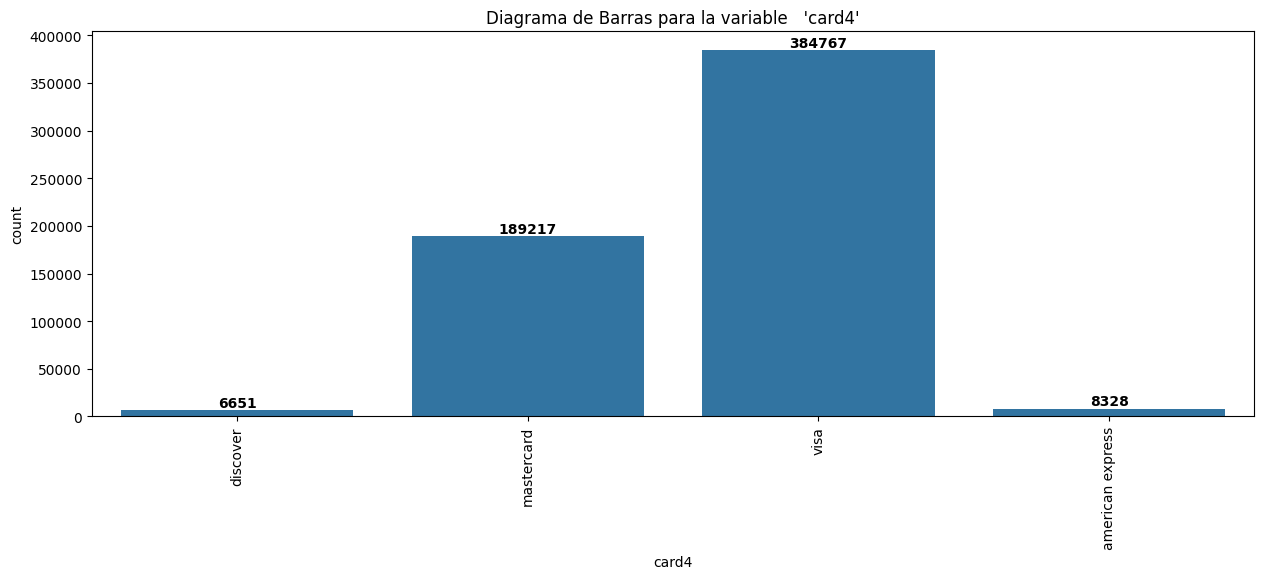

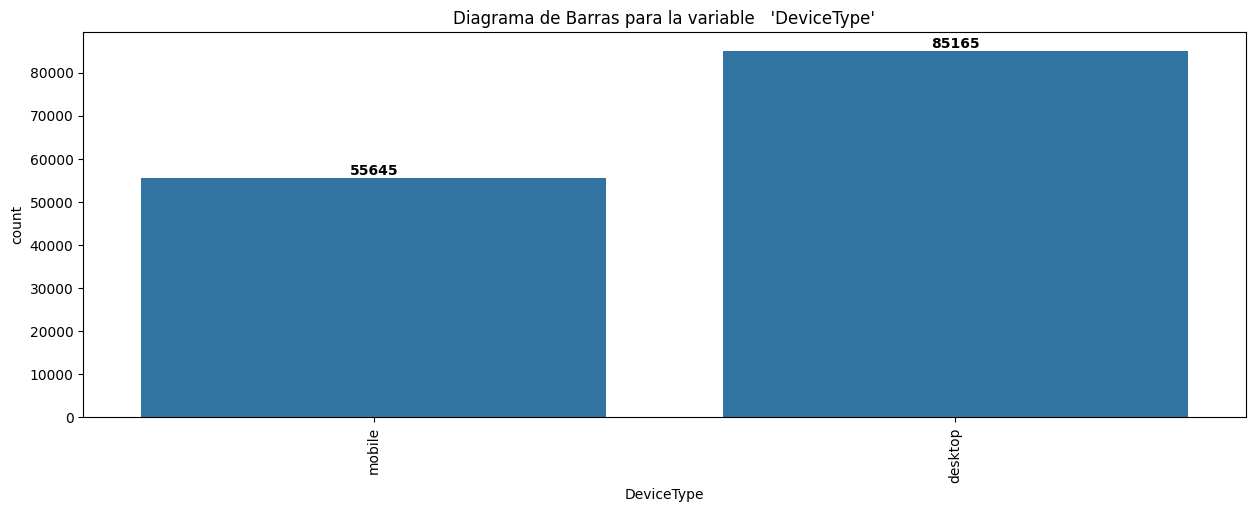

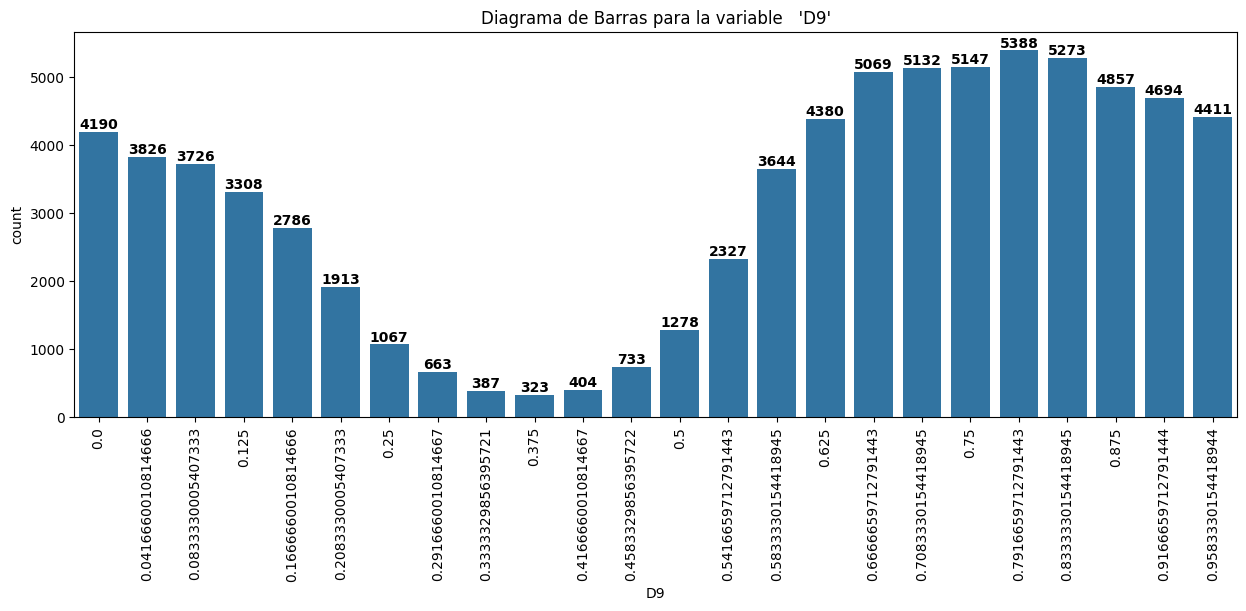

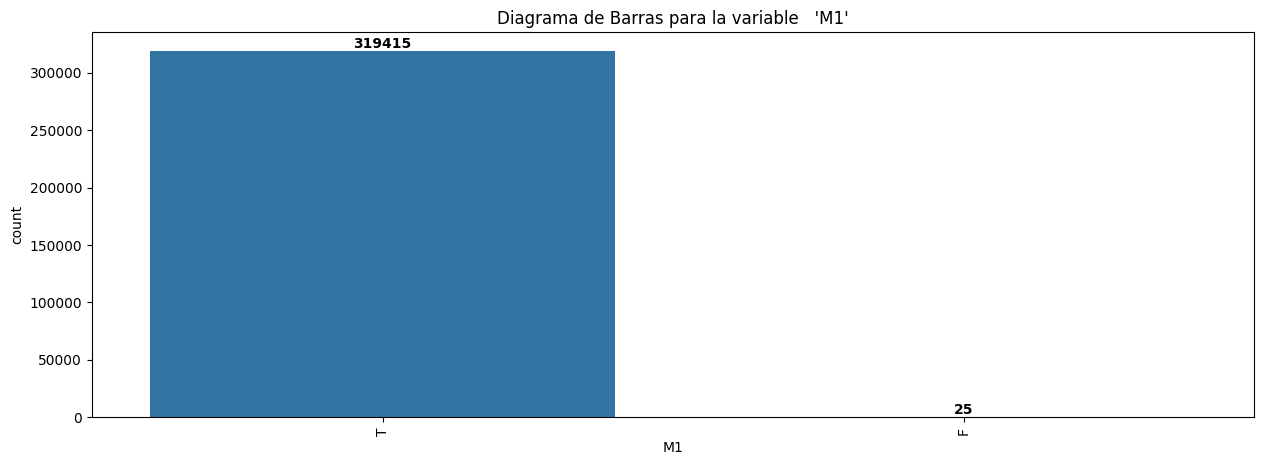

In [ ]:
fraude_variables_independientes = [
    "card4",
    "DeviceType",
    "D9",
    "M1",
]

for variable in fraude_variables_independientes:
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(
        data=df_train_full,
        x=variable,
    )
    plt.title(f"Diagrama de Barras para la variable   '{variable}'")
    plt.xticks(rotation=90)
    ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, fontweight='bold')
    plt.show()

<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> Se analizaron las distribuciones de las siguientes variables independientes consideradas relevantes para la detección de fraude: <ul> <li><strong>card4:</strong> Predominan dos emisores principales de tarjetas: <em>visa</em> (384,767 registros) y <em>mastercard</em> (189,217 registros), representando conjuntamente la gran mayoría de transacciones. Las categorías <em>discover</em> (6,651) y <em>american express</em> (8,328) tienen una participación mucho menor.</li> <li><strong>DeviceType:</strong> Se observa que el 60% de las transacciones provienen de dispositivos <em>desktop</em> (85,165 registros) y el 40% restante de dispositivos <em>mobile</em> (55,645 registros). Esto podría ser útil para detectar comportamientos sospechosos al comparar el tipo de dispositivo y el monto de la transacción.</li> <li><strong>D9:</strong> Esta variable muestra una distribución bastante uniforme y continua entre 0 y 1, aunque se destacan discretamente varios valores que se repiten, sugiriendo que podría tratarse de una característica normalizada o relacionada con tiempos de sesión o historial.</li> <li><strong>M1:</strong> Presenta un fuerte desbalance: la categoría <em>T</em> ("True") domina con 319,415 registros, mientras que la categoría <em>F</em> ("False") es casi inexistente (25 registros). Esto puede indicar que casi todas las transacciones cumplen con una condición determinada y que las excepciones podrían ser útiles como indicadores de fraude.</li> </ul> Estos patrones son esenciales para la etapa de ingeniería de características, permitiendo priorizar la selección y transformación de variables según su distribución y balance. </div> </div>

## **1.3. Limpieza y Preparación**

### **1.3.1. Tratamiento de Nulos**

In [28]:
# Hay varias columnas que tienen demasiadas categorias como para ser consideradas
# para un Encoder, por lo que se eliminaran

variables_a_eliminar = [
    "TransactionID",
    "id_30",
    "id_31",
    "id_33",
    "DeviceInfo",
    "P_emaildomain",
    "R_emaildomain",
]

df_train_full.drop(columns=variables_a_eliminar, inplace=True)
df_test_full.drop(columns=variables_a_eliminar, inplace=True)

In [29]:
cantidad_nulos_train = df_train_full.isna().sum().sort_values(ascending=False)
porcentaje_nulos_train = round(cantidad_nulos_train / df_train_full.shape[0] * 100, 1)

In [30]:
columnas_porc_nulos_50_train = porcentaje_nulos_train[porcentaje_nulos_train > 30].index.to_list()
porcentaje_nulos_train[porcentaje_nulos_train > 30]

,0
id_24,99.2
id_25,99.1
id_07,99.1
id_08,99.1
id_21,99.1
...,...
V11,47.3
M2,45.9
M3,45.9
M1,45.9


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> Se realizaron dos acciones críticas para optimizar el dataset antes de proceder al modelado: <ul> <li><strong>Eliminación de columnas:</strong> Se eliminaron variables que tienen demasiadas categorías únicas, lo que dificulta su codificación eficiente mediante métodos como <code>OneHotEncoder</code>. Las columnas eliminadas fueron: <code>TransactionID</code>, <code>id_30</code>, <code>id_31</code>, <code>id_33</code>, <code>DeviceInfo</code>, <code>P_emaildomain</code> y <code>R_emaildomain</code>. Esta limpieza contribuye a reducir la dimensionalidad y el riesgo de sobreajuste.</li> <li><strong>Análisis de valores faltantes:</strong> Se calculó el porcentaje de valores nulos para cada columna de <code>df_train_full</code>. Se encontró que un total de <strong>227 columnas</strong> tienen más del <strong>30% de datos faltantes</strong>.</li> </ul> Entre las columnas más afectadas se encuentran: <ul> <li><code>id_24</code>: 99.2% de datos faltantes</li> <li><code>id_25</code>: 99.1% de datos faltantes</li> <li><code>id_07</code>, <code>id_08</code>, <code>id_21</code>: aproximadamente 99.1% de datos faltantes</li> <li>Algunas variables de la familia <code>Vxx</code> y <code>Mxx</code> también presentan entre 40% y 50% de valores nulos.</li> </ul> Este análisis permitirá tomar decisiones informadas sobre: <ul> <li>Eliminar variables altamente incompletas (por ejemplo, con más del 90% de nulos).</li> <li>Imputar estratégicamente variables con porcentajes moderados de valores faltantes.</li> <li>Preparar los datos para técnicas de reducción de dimensionalidad o modelado más robusto.</li> </ul> </div> </div>

In [31]:
df_train_full.drop(columns=columnas_porc_nulos_50_train, inplace=True)
df_test_full.drop(columns=columnas_porc_nulos_50_train, inplace=True)

In [32]:
for columna in df_train_full.columns:
    if df_train_full[columna].isnull().any():  # Verificar si hay nulos en la columna
        moda = df_train_full[columna].mode()
        print(f"Moda para columna  {columna} : {moda.iloc[0]} ")
        df_train_full.fillna({columna: moda.iloc[0]}, inplace=True)
        df_test_full.fillna({columna: moda.iloc[0]}, inplace=True)

Moda para columna  card2 : 321.0 
Moda para columna  card3 : 150.0 
Moda para columna  card4 : visa 
Moda para columna  card5 : 226.0 
Moda para columna  card6 : debit 
Moda para columna  addr1 : 299.0 
Moda para columna  addr2 : 87.0 
Moda para columna  D1 : 0.0 
Moda para columna  D4 : 0.0 
Moda para columna  D10 : 0.0 
Moda para columna  D15 : 0.0 
Moda para columna  M6 : F 
Moda para columna  V12 : 1.0 
Moda para columna  V13 : 1.0 
Moda para columna  V14 : 1.0 
Moda para columna  V15 : 0.0 
Moda para columna  V16 : 0.0 
Moda para columna  V17 : 0.0 
Moda para columna  V18 : 0.0 
Moda para columna  V19 : 1.0 
Moda para columna  V20 : 1.0 
Moda para columna  V21 : 0.0 
Moda para columna  V22 : 0.0 
Moda para columna  V23 : 1.0 
Moda para columna  V24 : 1.0 
Moda para columna  V25 : 1.0 
Moda para columna  V26 : 1.0 
Moda para columna  V27 : 0.0 
Moda para columna  V28 : 0.0 
Moda para columna  V29 : 0.0 
Moda para columna  V30 : 0.0 
Moda para columna  V31 : 0.0 
Moda para columna  

<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> Se realizaron acciones importantes para la limpieza del conjunto de datos: <ul> <li><strong>Eliminación de variables:</strong> Se eliminaron 7 columnas (<code>TransactionID</code>, <code>id_30</code>, <code>id_31</code>, <code>id_33</code>, <code>DeviceInfo</code>, <code>P_emaildomain</code> y <code>R_emaildomain</code>) debido a que presentan demasiadas categorías distintas o niveles únicos, lo cual dificulta su codificación y uso efectivo en modelos predictivos.</li> <li><strong>Cálculo de porcentaje de valores nulos:</strong> Se determinó el porcentaje de valores nulos para cada columna. Se identificó que un total de <strong>227 variables</strong> presentan más del <strong>30% de valores faltantes</strong>.</li> <li><strong>Variables con nulos extremos:</strong> Por ejemplo, columnas como <code>id_24</code>, <code>id_25</code>, <code>id_07</code> y <code>id_08</code> tienen aproximadamente un <strong>99% de datos faltantes</strong>, lo cual sugiere que no serían útiles para el modelado y podrían ser candidatas para eliminación o imputación especial.</li> <li><strong>Variables parcialmente afectadas:</strong> Variables como <code>V11</code>, <code>M2</code>, <code>M3</code>, <code>M1</code> y <code>D3</code> tienen entre <strong>44% y 47%</strong> de datos faltantes, por lo cual es necesario evaluar si su información es relevante antes de decidir su eliminación.</li> </ul> Este paso es fundamental para optimizar el rendimiento del modelo, reducir dimensionalidad, y evitar sesgos debido a imputaciones inapropiadas en columnas con demasiados valores nulos. </div> </div>

### **1.3.2. Reduccion de Dimencionalidad con Chi2**

In [33]:
df_categoricas = df_train_full.select_dtypes(include=["object"])
df_categoricas

,ProductCD,card4,card6,M6
0,W,discover,credit,T
1,W,mastercard,credit,T
2,W,visa,debit,F
3,W,mastercard,debit,F
4,H,mastercard,credit,F
...,...,...,...,...
590535,W,visa,debit,F
590536,W,mastercard,debit,T
590537,W,mastercard,debit,T
590538,W,mastercard,debit,T


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> Se realizó una selección de las variables de tipo <code>object</code> en el conjunto <code>df_train_full</code>, identificándose un total de <strong>4 columnas categóricas</strong>: <ul> <li><strong>ProductCD:</strong> Representa el tipo de producto o servicio asociado a la transacción. Tiene valores como <em>W</em> y <em>H</em>.</li> <li><strong>card4:</strong> Indica la marca de la tarjeta usada en la transacción (por ejemplo: <em>visa</em>, <em>mastercard</em>, <em>discover</em>).</li> <li><strong>card6:</strong> Representa el tipo de tarjeta utilizada, diferenciando entre <em>credit</em> y <em>debit</em>.</li> <li><strong>M6:</strong> Variable binaria que suele representar un comportamiento en el historial del cliente (por ejemplo, valores <em>T</em> para True y <em>F</em> para False).</li> </ul> Estas variables son candidatas para ser codificadas mediante técnicas como <code>OneHotEncoding</code> o <code>LabelEncoding</code> en etapas posteriores del preprocesamiento, para su correcta utilización en modelos de Machine Learning que no aceptan datos categóricos sin procesar. </div> </div>

In [34]:
def calcular_p_valores(df):
    columnas = df.columns
    p_valores = pd.DataFrame(np.ones((len(columnas), len(columnas))),
                    columns=columnas,
                    index=columnas)

    for col1, col2 in combinations(columnas, 2):
        tabla_contingencia = pd.crosstab(df[col1], df[col2])
        try:
            _, p, _, _ = chi2_contingency(tabla_contingencia)
        except:
            p = 1.0  # En caso de error
        p_valores.loc[col1, col2] = p
        p_valores.loc[col2, col1] = p

    np.fill_diagonal(p_valores.values, 0)  # Ignorar diagonal
    return p_valores

In [35]:
p_valores = calcular_p_valores(df_categoricas)
significativos = p_valores < 0.05

print("Valores P de la prueba de Chi2")
p_valores

Valores P de la prueba de Chi2


,ProductCD,card4,card6,M6
ProductCD,0.0,0.0,0.0,0.0
card4,0.0,0.0,0.0,0.0
card6,0.0,0.0,0.0,0.0
M6,0.0,0.0,0.0,0.0


In [36]:
print("Significativos en la prueba de Chi2")
significativos

Significativos en la prueba de Chi2


,ProductCD,card4,card6,M6
ProductCD,True,True,True,True
card4,True,True,True,True
card6,True,True,True,True
M6,True,True,True,True


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> Se evaluó la independencia estadística entre las variables categóricas seleccionadas (<code>ProductCD</code>, <code>card4</code>, <code>card6</code> y <code>M6</code>) mediante la <strong>prueba de Chi-cuadrado de independencia</strong>: <ul> <li>Se construyeron tablas de contingencia para cada par de variables.</li> <li>Se calcularon los valores p (<em>p-values</em>) asociados a cada prueba Chi2.</li> <li>En todos los casos, los valores p resultaron ser <strong>0.0</strong>, indicando una dependencia estadísticamente significativa entre todas las combinaciones de variables (considerando un umbral de significancia de <strong>0.05</strong>).</li> </ul> <strong>Interpretación:</strong> <ul> <li>Las variables categóricas no son independientes entre sí.</li> <li>Existe una fuerte relación entre, por ejemplo, el tipo de producto (<code>ProductCD</code>) y el tipo de tarjeta utilizada (<code>card4</code>), o entre el tipo de tarjeta (<code>card6</code>) y el comportamiento de la variable <code>M6</code>.</li> <li>Esta dependencia debe tenerse en cuenta al momento de codificar o modelar, ya que podría introducir colinealidad si no se maneja adecuadamente.</li> </ul> <strong>

In [37]:
columnas_restantes = list(df_categoricas.columns)
columnas_a_eliminar = []

while True:
    print(f"Columnas categoricas restantes: {len(columnas_restantes)}")
    # Contar correlaciones por columna
    contador = {}
    for col in columnas_restantes:
        otras = [c for c in columnas_restantes if c != col]
        contador[col] = significativos.loc[col, otras].sum()

    max_correlaciones = max(contador.values(), default=0)
    if max_correlaciones == 0:
        break  # No hay más correlaciones

    # Eliminar la columna con más correlaciones
    columna_eliminar = [col for col, cnt in contador.items() if cnt == max_correlaciones][0]

    columnas_a_eliminar.append(columna_eliminar)
    columnas_restantes.remove(columna_eliminar)

print(f"\n\nColumnas categoricas que se quedan {columnas_restantes}")
print(f"\n\nColumnas categoricas que se eliminan {columnas_a_eliminar}")

df_test_full.drop(columns=columnas_a_eliminar, inplace=True)
df_train_full.drop(columns=columnas_a_eliminar, inplace=True)

Columnas categoricas restantes: 4
Columnas categoricas restantes: 3
Columnas categoricas restantes: 2
Columnas categoricas restantes: 1


Columnas categoricas que se quedan ['M6']


Columnas categoricas que se eliminan ['ProductCD', 'card4', 'card6']


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> Se implementó una estrategia automática para eliminar variables categóricas altamente correlacionadas entre sí: <ul> <li>Se inició con 4 variables categóricas: <code>ProductCD</code>, <code>card4</code>, <code>card6</code> y <code>M6</code>.</li> <li>Se calculó, para cada variable, el número de correlaciones significativas detectadas previamente mediante la prueba de Chi-cuadrado.</li> <li>Iterativamente, se eliminó la variable que tenía el mayor número de correlaciones significativas, reduciendo progresivamente el conjunto de variables.</li> </ul> <strong>Resultados:</strong> <ul> <li>Variables eliminadas: <code>ProductCD</code>, <code>card4</code> y <code>card6</code>.</li> <li>Variable retenida: <code>M6</code>.</li> </ul> <strong>Interpretación:</strong> <ul> <li>La variable <code>M6</code> fue la que presentó menor redundancia de información frente a las demás, justificando su conservación en el conjunto de entrenamiento y prueba.</li> <li>La eliminación de variables altamente correlacionadas ayuda a <strong>reducir la multicolinealidad</strong> en modelos de clasificación, mejora la interpretabilidad y evita que modelos complejos se sobreajusten a patrones espurios.</li> </ul> </div> </div>

### **1.3.3. Reduccion de dimensionalidad con VIF**

In [38]:
df_numerico = df_train_full.select_dtypes(include=["float64", "int64"])
df_numerico

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,0,86400,68.50,13926,321.0,150.0,142.0,315.0,87.0,1.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,0,86401,29.00,2755,404.0,150.0,102.0,325.0,87.0,1.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0,86469,59.00,4663,490.0,150.0,166.0,330.0,87.0,1.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0,86499,50.00,18132,567.0,150.0,117.0,476.0,87.0,2.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,0,86506,50.00,4497,514.0,150.0,102.0,420.0,87.0,1.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,15811047,49.00,6550,321.0,150.0,226.0,272.0,87.0,2.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,0,15811049,39.50,10444,225.0,150.0,224.0,204.0,87.0,1.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,0,15811079,30.95,12037,595.0,150.0,224.0,231.0,87.0,1.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,0,15811088,117.00,7826,481.0,150.0,224.0,387.0,87.0,1.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> En esta fase se realizó la selección de las variables numéricas para la aplicación del análisis de <strong>Reducción de Dimensionalidad</strong> mediante el <strong>Factor de Inflación de la Varianza (VIF)</strong>. <ul> <li>Se extrajeron todas las columnas de tipo <code>float64</code> e <code>int64</code> del conjunto de datos <code>df_train_full</code>.</li> <li>Se obtuvo un nuevo dataframe llamado <code>df_numerico</code> compuesto por <strong>196 variables numéricas</strong>.</li> </ul> <strong>Importancia del procedimiento:</strong> <ul> <li>El VIF permite identificar variables altamente correlacionadas entre sí, lo que puede afectar negativamente la calidad de los modelos predictivos, especialmente en algoritmos sensibles a la multicolinealidad como la regresión logística o los modelos lineales en general.</li> <li>Reducir la multicolinealidad mejora la estabilidad de los coeficientes, evita redundancia informativa y facilita la interpretación de los modelos.</li> </ul> <strong>

*Debido a las caracteristicas de Google Colab de que no es posible ejecutar un algoritmo por mas de 1 hora sin que se desconecte la instancia, la eliminacion de los VIF se hizo paulativamente y se fue anotando cuales eran las variables eliminadas para que al momento de volver a ejecutar el codigo, estas se eliminaran del dataframe antes de continuar con el procedimiento.*

In [39]:
# Columna eliminada 'V97' con VIF: 6385753.148413811
# Columna eliminada 'V96' con VIF: 2980581.4650588417
# Columna eliminada 'V280' con VIF: 946847.5605745484
# Columna eliminada 'V308' con VIF: 680987.9367579839
# Columna eliminada 'V95' con VIF: 413564.33749025664
# Columna eliminada 'V307' con VIF: 290090.80968394416
# Columna eliminada 'V126' con VIF: 131630.34998746112
# Columna eliminada 'V279' con VIF: 99568.92630256433
# Columna eliminada 'V127' con VIF: 23906.13163455604
# Columna eliminada 'V134' con VIF: 7167.980093190434
# Columna eliminada 'C12' con VIF: 4610.0395266698415
# Columna eliminada 'V103' con VIF: 4096.66280755667
# Columna eliminada 'V316' con VIF: 2488.745555478495
# Columna eliminada 'V293' con VIF: 2397.338403604842
# Columna eliminada 'C11' con VIF: 1812.3552275020093
# Columna eliminada 'C8' con VIF: 1391.389701468855
# Columna eliminada 'V294' con VIF: 1149.6820327570645
# Columna eliminada 'C4' con VIF: 588.5989949227932
# Columna eliminada 'V133' con VIF: 578.3210694759822
# Columna eliminada 'V132' con VIF: 484.08811546256317
# Columna eliminada 'V318' con VIF: 436.2367451591822
# Columna eliminada 'C10' con VIF: 419.962508303669
# Columna eliminada 'V15' con VIF: 338.4806837144098
# Columna eliminada 'C6' con VIF: 277.8255230653713
# Columna eliminada 'V57' con VIF: 264.71531702204805
# Columna eliminada 'V295' con VIF: 196.20506417179288
# Columna eliminada 'C1' con VIF: 194.24500060236178
# Columna eliminada 'V298' con VIF: 184.30862482899562
# Columna eliminada 'V137' con VIF: 164.58050801517732
# Columna eliminada 'V17' con VIF: 153.2256749049885
# Columna eliminada 'V102' con VIF: 150.9588074131013
# Columna eliminada 'V32' con VIF: 102.7404663093373
# Columna eliminada 'V106' con VIF: 100.98773708269033
# Columna eliminada 'C2' con VIF: 86.11639631025432
# Columna eliminada 'V306' con VIF: 81.94410756153545
# Columna eliminada 'V93' con VIF: 81.14716291016839
# Columna eliminada 'V105' con VIF: 71.19150815753059
# Columna eliminada 'V128' con VIF: 63.23130342975755
# Columna eliminada 'V72' con VIF: 59.61719315451742
# Columna eliminada 'C13' con VIF: 51.10063313196958
# Columna eliminada 'V321' con VIF: 50.89755295618454
# Columna eliminada 'V84' con VIF: 48.62129936909281
# Columna eliminada 'V63' con VIF: 42.267377955572535
# Columna eliminada 'V51' con VIF: 38.90878989197315
# Columna eliminada 'V33' con VIF: 37.618501442554404
# Columna eliminada 'V136' con VIF: 36.12573298317818
# Columna eliminada 'V90' con VIF: 35.52295678457032
# Columna eliminada 'V304' con VIF: 34.890533696939876
# Columna eliminada 'V21' con VIF: 33.55770979716764
# Columna eliminada 'V42' con VIF: 29.202791751625362
# Columna eliminada 'V59' con VIF: 28.204369797660856
# Columna eliminada 'V73' con VIF: 27.23591501275453
# Columna eliminada 'V69' con VIF: 26.153089272639594
# Columna eliminada 'V81' con VIF: 25.262455291536234
# Columna eliminada 'V58' con VIF: 24.41515428442981
# Columna eliminada 'V292' con VIF: 24.375737451682628
# Columna eliminada 'V48' con VIF: 23.65961185877247
# Columna eliminada 'V28' con VIF: 23.203525055368573
# Columna eliminada 'V16' con VIF: 21.24258783006306
# Columna eliminada 'V299' con VIF: 20.01301843186232
# Columna eliminada 'V131' con VIF: 19.27902029391925
# Columna eliminada 'V317' con VIF: 18.389502612834114
# Columna eliminada 'V92' con VIF: 18.0282852662873
# Columna eliminada 'V94' con VIF: 17.704913104898296
# Columna eliminada 'V30' con VIF: 17.447311351011063
# Columna eliminada 'V39' con VIF: 16.199512137116862
# Columna eliminada 'V320' con VIF: 16.189243430240783
# Columna eliminada 'V309' con VIF: 15.416507582967746
# Columna eliminada 'V31' con VIF: 14.753774920514614
# Columna eliminada 'V315' con VIF: 14.400701016770533
# Columna eliminada 'V76' con VIF: 14.37065360874736
# Columna eliminada 'V45' con VIF: 13.11564471190686
# Columna eliminada 'V35' con VIF: 12.70745812952196
# Columna eliminada 'V287' con VIF: 12.487475844464422
# Columna eliminada 'V50' con VIF: 12.184244762580407
# Columna eliminada 'V113' con VIF: 11.93384008839884
# Columna eliminada 'V22' con VIF: 11.553486178587873
# Columna eliminada 'V12' con VIF: 11.169807495347724
# Columna eliminada 'V116' con VIF: 10.616482079016798
# Columna eliminada 'V297' con VIF: 10.517905438986556
# Columna eliminada 'V64' con VIF: 10.27872623677124
# Columna eliminada 'V52' con VIF: 10.245754798460924
# Columna eliminada 'V19' con VIF: 10.182913772262543
# Columna eliminada 'V99' con VIF: 10.151263727310196

lista_columnas_eliminadas_vif = [
    'V97','V96','V280','V308','V95','V307','V126','V279',
    'V127','V134','C12','V103','V316','V293','C11','C8','V294',
    'C4','V133','V132','V318','C10','V15','C6','V57','V295',
    'C1','V298','V137','V17','V102','V32','V106','C2','V306','V93',
    'V105','V128','V72','C13','V321','V84','V63','V51','V33','V136',
    'V90','V304','V21','V42','V59','V73','V69','V81','V58','V292',
    'V48','V28','V16','V299','V131','V317','V92','V94','V30','V39',
    'V320','V309','V31','V315','V76','V45','V35','V287','V50','V113',
    'V22','V12','V116','V297','V64','V52','V19','V99',
]

df_numerico.drop(columns=lista_columnas_eliminadas_vif, inplace=True)


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> Se aplicó una reducción de dimensionalidad sobre las variables numéricas mediante el cálculo del <strong>Factor de Inflación de la Varianza (VIF)</strong>. <ul> <li>Se eliminaron todas las columnas cuyo VIF era superior al umbral crítico de <strong>10</strong>.</li> <li>En total, se eliminaron <strong>84 variables</strong> del conjunto <code>df_numerico</code>.</li> <li>Las variables eliminadas presentaban problemas severos de multicolinealidad, algunos con valores de VIF extremadamente altos (por ejemplo, 'V97' con un VIF de más de 6 millones).</li> </ul> <strong>Resumen de variables más críticas eliminadas:</strong>
<ul>
  <li><strong>'V97'</strong>: VIF ≈ 6,385,753</li>
  <li><strong>'V96'</strong>: VIF ≈ 2,980,581</li>
  <li><strong>'V280'</strong>: VIF ≈ 946,848</li>
  <li><strong>'V308'</strong>: VIF ≈ 680,988</li>
  <li>...</li>
</ul>

<strong>Impacto de la limpieza:</strong>
<ul>
  <li>Se mejora la calidad de los futuros modelos predictivos, reduciendo el riesgo de sobreajuste y mejorando la estabilidad de las métricas de desempeño.</li>
  <li>Se facilita la interpretación de los modelos y se evita el solapamiento informativo entre predictores.</li>
</ul>
</div> </div>

In [40]:

def calcular_vif(X, limite):
    X = X.copy()
    while True:
        X_const = add_constant(X)
        vifs = pd.Series(
            [variance_inflation_factor(X_const.values, i + 1) for i in range(X.shape[1])],
            index=X.columns
        )
        max_vif = vifs.max()
        if max_vif > limite:
            drop_col = vifs.idxmax()
            print(f"Columna eliminada '{drop_col}' con VIF: {max_vif}")
            X = X.drop(columns=[drop_col])
        else:
            print(f"No hay mas columnas con un VIF mayor a {limite}")
            break

    return X


df_numerico_copy = df_numerico.drop(columns=["isFraud"])

# Desactivamos el calculo del VIF porque ya las columnas calculadas en horas pasadas
# fueron eliminadas
# df_numerico_copy_limpio = calcular_vif(df_numerico_copy, limite=10.0)

df_numerico_copy_limpio = df_numerico_copy


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> Se definió una función personalizada llamada <code>calcular_vif</code> para automatizar el proceso de reducción de multicolinealidad basado en el <strong>Variance Inflation Factor (VIF)</strong>.
php-template
Copiar
Editar
<ul>
  <li>Esta función calcula iterativamente el VIF para todas las variables numéricas.</li>
  <li>En cada iteración elimina la columna que presenta el VIF más alto, siempre y cuando supere un límite predefinido.</li>
  <li>El proceso se detiene cuando ninguna columna supera el umbral de VIF (<code>límite</code>).</li>
</ul>

<strong>Detalles clave de la implementación:</strong>
<ul>
  <li>Se hace una copia del DataFrame para evitar modificaciones accidentales del original.</li>
  <li>Se utiliza <code>add_constant</code> para incluir una constante (bias) en el modelo interno de regresión.</li>
  <li>Se identifica y elimina de manera óptima la variable más problemática en cada paso.</li>
</ul>

<strong>Notas importantes:</strong>
<ul>
  <li>En esta ejecución no se volvió a calcular el VIF porque las columnas más problemáticas ya habían sido eliminadas en procesos anteriores.</li>
  <li>Se trabajó a partir de <code>df_numerico_copy</code> excluyendo la variable objetivo (<code>isFraud</code>).</li>
</ul>

<strong>Estado final:</strong>
<ul>
  <li><code>df_numerico_copy_limpio</code> quedó listo para futuras etapas de análisis o modelado.</li>
</ul>
</div> </div>

In [41]:
df_train_full.drop(columns=lista_columnas_eliminadas_vif, inplace=True)
df_test_full.drop(columns=lista_columnas_eliminadas_vif, inplace=True)

In [42]:
columnas_categoricas = ['M6']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(df_train_full[columnas_categoricas])

df_train_full_encoded = encoder.transform(df_train_full[columnas_categoricas])
df_test_full_encoded = encoder.transform(df_test_full[columnas_categoricas])

df_train_full_encoded = pd.DataFrame(df_train_full_encoded, columns=encoder.get_feature_names_out(columnas_categoricas))
df_test_full_encoded = pd.DataFrame(df_test_full_encoded, columns=encoder.get_feature_names_out(columnas_categoricas))

df_train_full_encoded

,M6_F,M6_T
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
590535,1.0,0.0
590536,0.0,1.0
590537,0.0,1.0
590538,0.0,1.0


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> Se aplicó la codificación <strong>One-Hot Encoding</strong> sobre la variable categórica <code>M6</code> para convertirla en variables binarias que puedan ser utilizadas en modelos de Machine Learning.
php-template
Copiar
Editar
<ul>
  <li>Se utilizó la clase <code>OneHotEncoder</code> de <code>sklearn.preprocessing</code> con los parámetros:
    <ul>
      <li><code>handle_unknown='ignore'</code> para manejar categorías desconocidas en el conjunto de prueba.</li>
      <li><code>sparse_output=False</code> para obtener un array denso (tipo <code>numpy.ndarray</code>).</li>
    </ul>
  </li>
  <li>Se codificó tanto el conjunto de entrenamiento (<code>df_train_full</code>) como el conjunto de prueba (<code>df_test_full</code>).</li>
  <li>El resultado fue almacenado en dos nuevos DataFrames:
    <ul>
      <li><code>df_train_full_encoded</code> para entrenamiento.</li>
      <li><code>df_test_full_encoded</code> para prueba.</li>
    </ul>
  </li>
  <li>Las columnas generadas fueron <code>M6_F</code> y <code>M6_T</code>, correspondientes a las categorías 'F' (False) y 'T' (True) de la variable original.</li>
</ul>

<strong>Observaciones adicionales:</strong>
<ul>
  <li>La transformación se realizó exitosamente para las 590,540 observaciones.</li>
  <li>Este paso facilita la integración de la variable <code>M6</code> codificada en futuros modelos que requieren variables numéricas.</li>
</ul>
</div> </div>

In [43]:
df_train_full = pd.concat([df_train_full.drop(columnas_categoricas, axis=1).reset_index(drop=True), df_train_full_encoded], axis=1)
df_test_full = pd.concat([df_test_full.drop(columnas_categoricas, axis=1).reset_index(drop=True), df_test_full_encoded], axis=1)

df_train_full

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C3,...,V303,V305,V310,V311,V312,V313,V314,V319,M6_F,M6_T
0,0,86400,68.50,13926,321.0,150.0,142.0,315.0,87.0,0.0,...,0.0,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0
1,0,86401,29.00,2755,404.0,150.0,102.0,325.0,87.0,0.0,...,0.0,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0
2,0,86469,59.00,4663,490.0,150.0,166.0,330.0,87.0,0.0,...,0.0,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0
3,0,86499,50.00,18132,567.0,150.0,117.0,476.0,87.0,0.0,...,0.0,1.0,354.000000,0.0,135.0,0.000000,0.000000,0.000000,1.0,0.0
4,0,86506,50.00,4497,514.0,150.0,102.0,420.0,87.0,0.0,...,1.0,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,15811047,49.00,6550,321.0,150.0,226.0,272.0,87.0,0.0,...,0.0,1.0,47.950001,0.0,0.0,47.950001,47.950001,0.000000,1.0,0.0
590536,0,15811049,39.50,10444,225.0,150.0,224.0,204.0,87.0,0.0,...,0.0,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0
590537,0,15811079,30.95,12037,595.0,150.0,224.0,231.0,87.0,0.0,...,0.0,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0
590538,0,15811088,117.00,7826,481.0,150.0,224.0,387.0,87.0,0.0,...,0.0,1.0,669.500000,0.0,117.0,317.500000,669.500000,0.000000,0.0,1.0


<div style="border-left: 6px solid #2ecc71; border-radius: 6px; overflow: hidden;"> <div style="background-color: #d4f8e8; padding: 8px 12px;"> <strong>💡 Análisis</strong> </div> <div style="background-color: #f5fdf9; padding: 12px;"> Se realizó la <strong>reconstrucción final</strong> de los datasets <code>df_train_full</code> y <code>df_test_full</code> después de aplicar la codificación <code>One-Hot Encoding</code>.
php-template
Copiar
Editar
<ul>
  <li>Se eliminaron las columnas categóricas originales (<code>M6</code>) de los datasets.</li>
  <li>Se concatenaron las nuevas columnas codificadas (<code>M6_F</code> y <code>M6_T</code>) utilizando <code>pd.concat(..., axis=1)</code>.</li>
  <li>El índice fue reseteado para asegurar la correcta alineación de las filas mediante <code>reset_index(drop=True)</code>.</li>
</ul>

<strong>Resultados:</strong>
<ul>
  <li>El dataset <code>df_train_full</code> final contiene <strong>590,540 observaciones</strong> y <strong>114 columnas</strong>.</li>
  <li>Se conserva la variable objetivo <code>isFraud</code> junto con las variables numéricas y las variables categóricas codificadas.</li>
  <li>Este dataset ya está preparado para ser utilizado en la construcción de modelos de clasificación.</li>
</ul>

<strong>Observaciones importantes:</strong>
<ul>
  <li>La operación se aplicó simétricamente al conjunto de prueba <code>df_test_full</code> para asegurar consistencia.</li>
  <li>Ahora todas las variables del dataset son numéricas, condición esencial para la mayoría de algoritmos de Machine Learning tradicionales.</li>
</ul>
</div> </div>